__A/A testing of the mobile application. It is necessary to calculate the results of the A / A test by checking the FPR quality metric (conversions to a purchase). The split system is known to be broken. It is required to check the statement about the breakdown and find its causes, if the split system is really broken__

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('hw_aa.csv', sep=';', index_col = 'Unnamed: 0')

In [3]:
# check head 
df.head()

,uid,experimentVariant,version,purchase
1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [4]:
# check missing values
df.isna().sum()

uid                  0
experimentVariant    0
version              0
purchase             0
dtype: int64

In [5]:
df.dtypes

uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

  0%|          | 0/1000 [00:00<?, ?it/s]

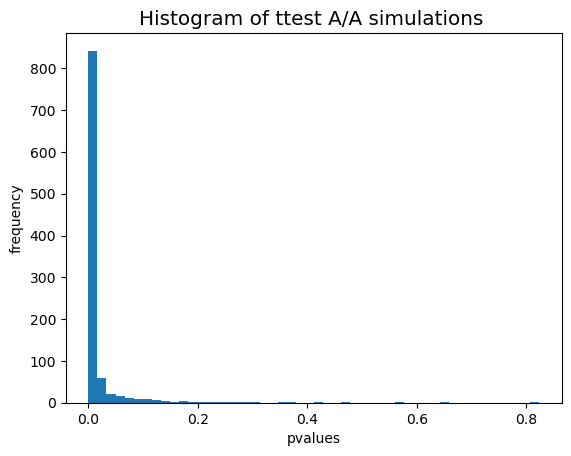

0.92

In [6]:
# run AA-test

simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df[df.experimentVariant == 0].purchase.sample(n_s, replace = False).values
    s2 = df[df.experimentVariant == 1].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Check False Positive Rate
sum(np.array(res) <0.05) / simulations

The resulting FPR value should not exceed 0.05. It is known that there is a problem in the split system. Perhaps the problem is related to the version of the mobile application

In [7]:
# find all verdions of mobile app 
df.version.unique()

array(['v2.8.0', 'v2.9.0', 'v3.7.4.0', 'v3.8.0.0'], dtype=object)

In [8]:
df.groupby(['experimentVariant', 'version']).agg({'purchase': 'sum'})

purchase
experimentVariant version           
0                 v2.8.0          41
                  v2.9.0         890
                  v3.7.4.0       252
                  v3.8.0.0       328
1                 v2.8.0        1895
                  v2.9.0         858
                  v3.7.4.0       266
                  v3.8.0.0       384

It can be seen that in version 0 of the experiment in version v2.8.0, the number of purchases (41) is significantly less than in version 1

Let's calculate the FRP for all versions of the mobile application separately

v2.8.0 version

  0%|          | 0/1000 [00:00<?, ?it/s]

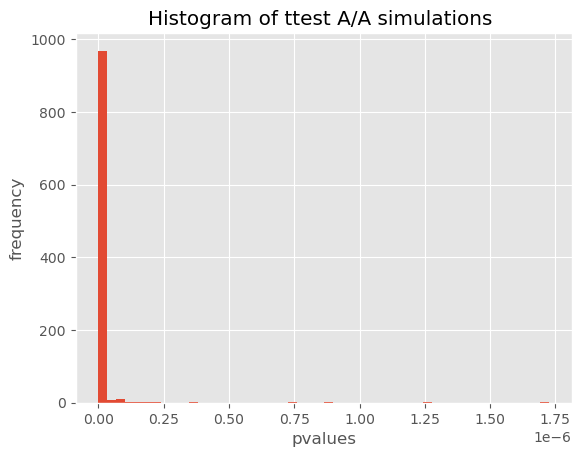

1.0

In [9]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 0) & (df.version == 'v2.8.0')].purchase.sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 1) & (df.version == 'v2.8.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Check False Positive Rate
sum(np.array(res) <0.05) / simulations

v2.9.0 version

  0%|          | 0/1000 [00:00<?, ?it/s]

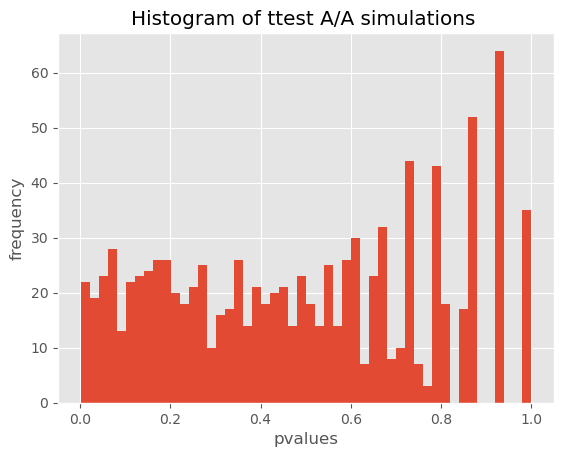

0.052

In [10]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 0) & (df.version == 'v2.9.0')].purchase.sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 1) & (df.version == 'v2.9.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Check False Positive Rate
sum(np.array(res) <0.05) / simulations

v3.7.4.0 version

  0%|          | 0/1000 [00:00<?, ?it/s]

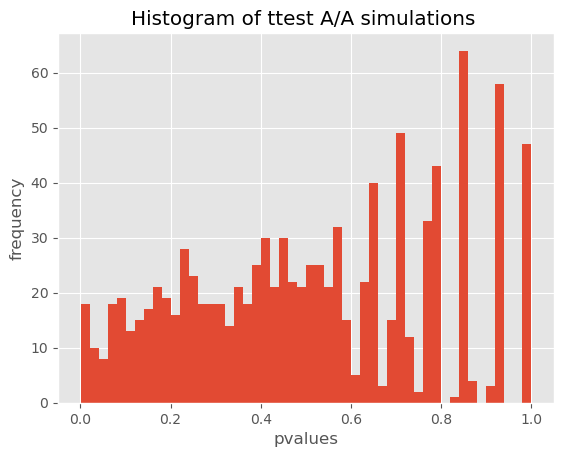

0.033

In [11]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 0) & (df.version == 'v3.7.4.0')].purchase.sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 1) & (df.version == 'v3.7.4.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Check False Positive Rate
sum(np.array(res) <0.05) / simulations

v3.8.0.0 version

  0%|          | 0/1000 [00:00<?, ?it/s]

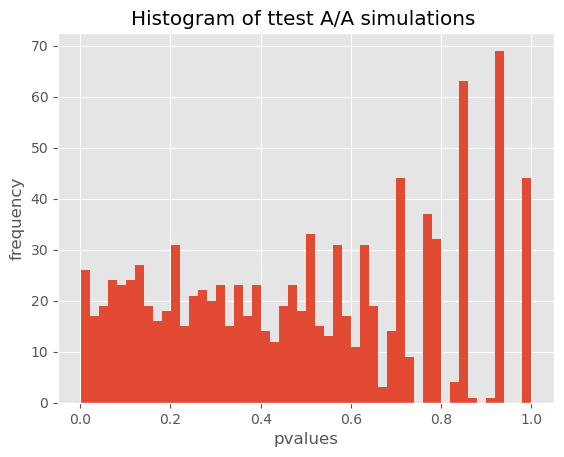

0.05

In [12]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 0) & (df.version == 'v3.8.0.0')].purchase.sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 1) & (df.version == 'v3.8.0.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Check False Positive Rate
sum(np.array(res) <0.05) / simulations

Of all the considered versions of the mobile application, only for version v2.8.0, the statistical criterion shows the presence of differences in 100% of cases. Therefore, this version should be excluded from consideration.

  0%|          | 0/1000 [00:00<?, ?it/s]

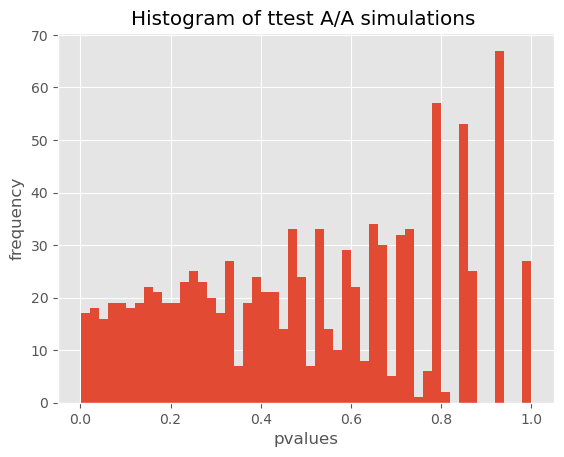

0.042

In [14]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 0) & (df.version != 'v2.8.0')].purchase.sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 1) & (df.version != 'v2.8.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Check False Positive Rate
sum(np.array(res) <0.05) / simulations

__Conclusions: The results of the AA test showed that the split system is really broken. On samples collected for version v2.8.0, there are statistically significant differences in both versions of the experiment. Variant 0 had a significantly lower purchase conversion than Variant 1 (41 vs. 1895).__